In [118]:
import pickle
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [39]:
def read_results(result_path):
    with open(result_path, 'rb') as file:
        results = pickle.load(file)
    return results

{'modelname': 'STAMP', 'C': 1000, 't': 50, 'param_source': 'rsc15', 'config': {'model': {'name': 'STAMP', 'embedding_size': 64}, 'optimizer': {'lr': 0.02}, 'trainer': {'accelerator': 'auto'}, 'dataset': {'n_items': 1000, 'max_seq_length': 50}}, 'runtime': 'jitopt_cuda', 'latency_df':         LatencyInMs                   DateTime
0            8.3383 2023-03-23 19:50:02.587349
1          680.6615 2023-03-23 19:50:03.274849
2            0.6538 2023-03-23 19:50:03.274849
3            0.5682 2023-03-23 19:50:03.274849
4            0.5637 2023-03-23 19:50:03.274849
...             ...                        ...
101529       0.7862 2023-03-23 19:51:42.569824
101530       0.7971 2023-03-23 19:51:42.569824
101531       0.7854 2023-03-23 19:51:42.569824
101532       1.2985 2023-03-23 19:51:42.569824
101533       0.7986 2023-03-23 19:51:42.585449

[101534 rows x 2 columns], 'benchmark': 'single threaded microbenchmark', 'device': 'Intel(R) Core(TM) i9-10900KF CPU @ 3.70GHz', 'platform': 'Windows

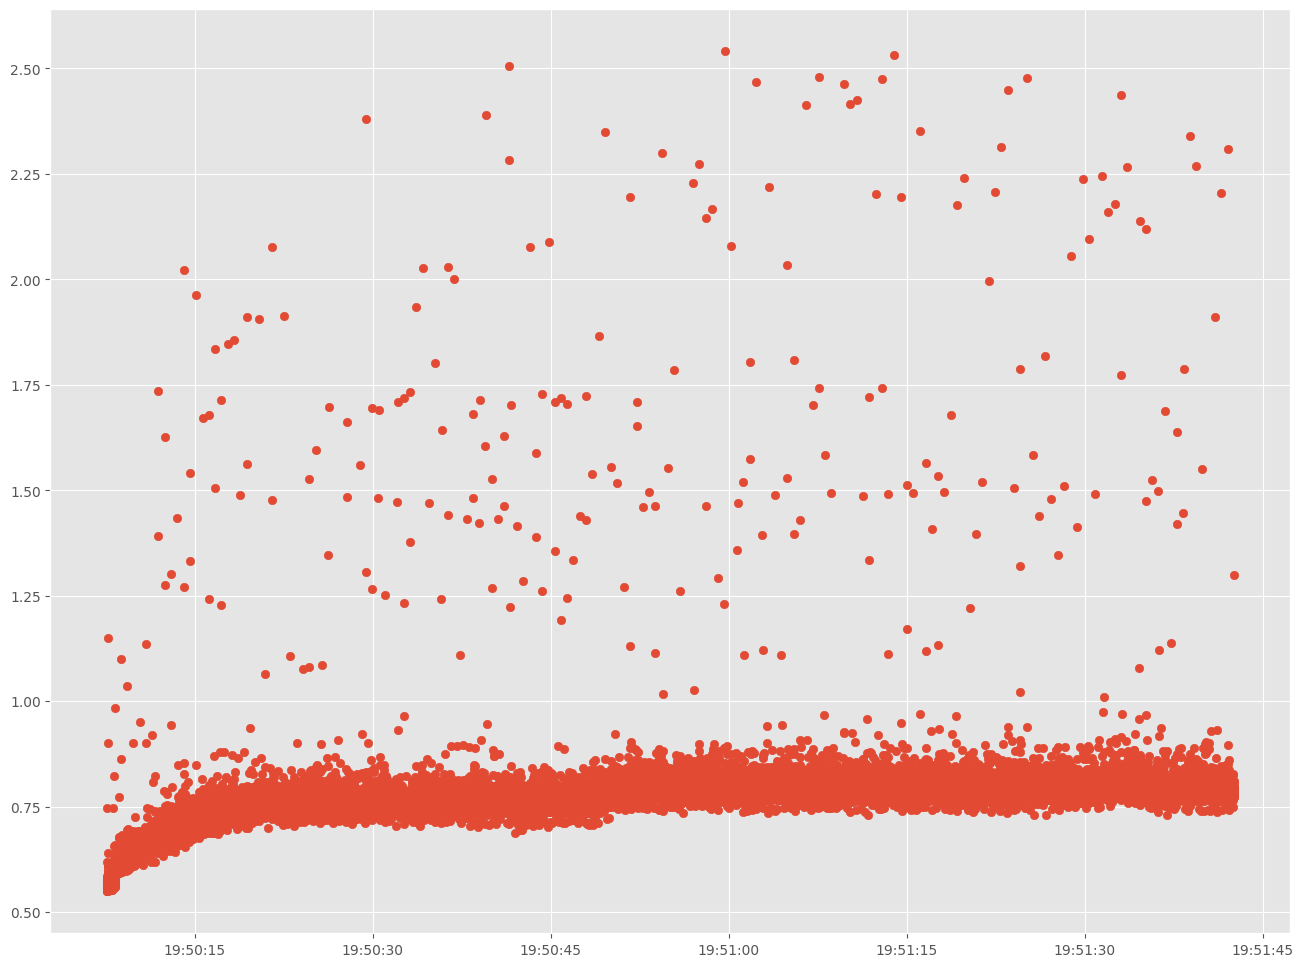

In [129]:
result_path = '../../projects/benchmark/results'
algo = 'STAMP'
runtime = 'jitopt'
device = 'cuda'
datasource = 'rsc15'
C = 1000
filename = f'{algo}_{runtime}_{device}_{datasource}_C{C}_t50_results.pickle'
r = read_results(os.path.join(result_path, filename))
# for filename in os.listdir(result_path):
#     if 'CORE' in filename and 'bolcom' in filename and 'C10000000_' in filename:
#         f = os.path.join(result_path, filename)
#         # checking if it is a file
#         if os.path.isfile(f):
#             print(f)
#             r = read_results(f)
#             break
latency_df = r['latency_df']
filtered_df = latency_df[latency_df['DateTime'] >= (latency_df['DateTime'].min() + pd.Timedelta(seconds=5))]
filtered_df
print(r)
print(latency_df['DateTime'].min())
print(latency_df['DateTime'].max())
plt.scatter(filtered_df['DateTime'], filtered_df['LatencyInMs'])
plt.show()

In [86]:
latency_df

,LatencyInMs,DateTime
0,10.8709,2023-03-23 04:44:10.632091
1,10.5381,2023-03-23 04:44:10.632091
2,10.4430,2023-03-23 04:44:10.647699
3,9.8403,2023-03-23 04:44:10.663328
4,9.7151,2023-03-23 04:44:10.663328
...,...,...
9993,9.5858,2023-03-23 04:45:50.580575
9994,9.5817,2023-03-23 04:45:50.596203
9995,9.5696,2023-03-23 04:45:50.611827
9996,9.5881,2023-03-23 04:45:50.611827


In [164]:
def get_results(modelname, runtime, device, datasource):
    result_path = '../../projects/benchmark/results'
    result = {}
    for C in [1000, 10000, 100000, 1000000, 10000000]:
        filename = f'{modelname}_{runtime}_{device}_{datasource}_C{C}_t50_results.pickle'
        f = os.path.join(result_path, filename)
        if os.path.isfile(f):
            r = read_results(f)
            result[C] = r['latency_df']
    return result

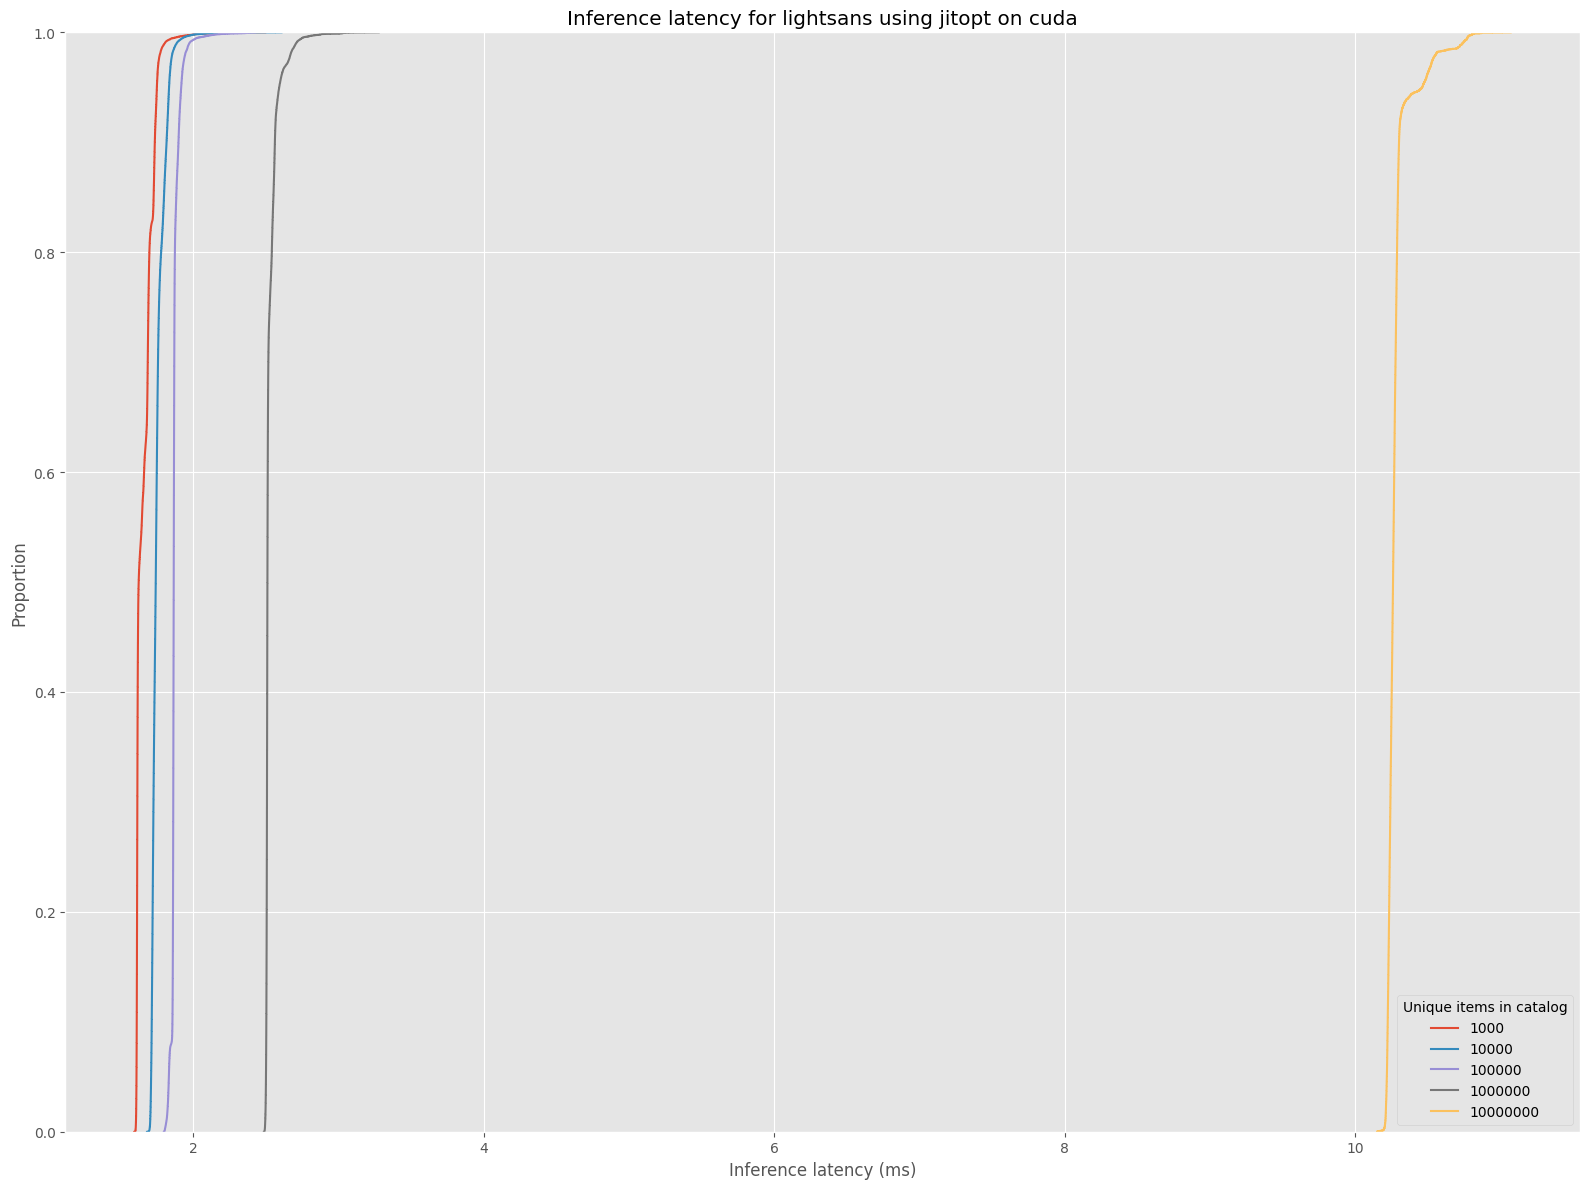

In [228]:
# for model_name in ['core', 'gcsan', 'gru4rec', 'lightsans', 'narm', 'repeatnet', 'sasrec', 'sine', 'srgnn',
#                        'stamp']:
model_name='lightsans'
runtime = 'jitopt'
device = 'cuda'
datasource = 'bolcom'
results = get_results(model_name, runtime, device, datasource)
fig, ax = plt.subplots(figsize=(16, 12))
for C, latency_df in results.items():
    filtered_df = latency_df[latency_df['DateTime'] >= (latency_df['DateTime'].min() + pd.Timedelta(seconds=5))]
    # add 1 ms for log transformation
    # filtered_df['LatencyInMs'] = filtered_df['LatencyInMs'] + 1
    # sns.kdeplot(data = filtered_df['LatencyInMs'], cumulative = True, label = f'{C}', log_scale=False, ax=ax)
    sns.ecdfplot(data=filtered_df['LatencyInMs'], complementary=False, label=f'{C}', log_scale=False, ax=ax)
plt.title(f'Inference latency for {model_name} using {runtime} on {device}')
# Get the matplotlib axis object
ax = plt.gca()
# Set the x-axis limits
# ax.set_xlim([0, 20])
# plt.axvline(x = 50, label = '50ms threshold')
ax.legend()
# plt.yscale('log')
plt.legend(title='Unique items in catalog')
plt.tight_layout()
plt.xlabel('Inference latency (ms)')
plt.savefig(f'{model_name}_{runtime}_{device}_{datasource}.pdf', bbox_inches='tight')
plt.show()

In [235]:
a = filtered_df['LatencyInMs'] 

q50, q90, q99 = np.percentile(a, q=[0.5, 0.9, 0.99])
q50, q90, q99

(10.203071000002488, 10.206703900001418, 10.207488580000197)

In [211]:
latency_df['LatencyInMs'] 

0        16.6610
1       688.5190
2         9.3676
3         9.1941
4         9.2180
          ...   
8695      9.2122
8696      9.2523
8697      9.1962
8698      9.1930
8699      9.3632
Name: LatencyInMs, Length: 8700, dtype: float64

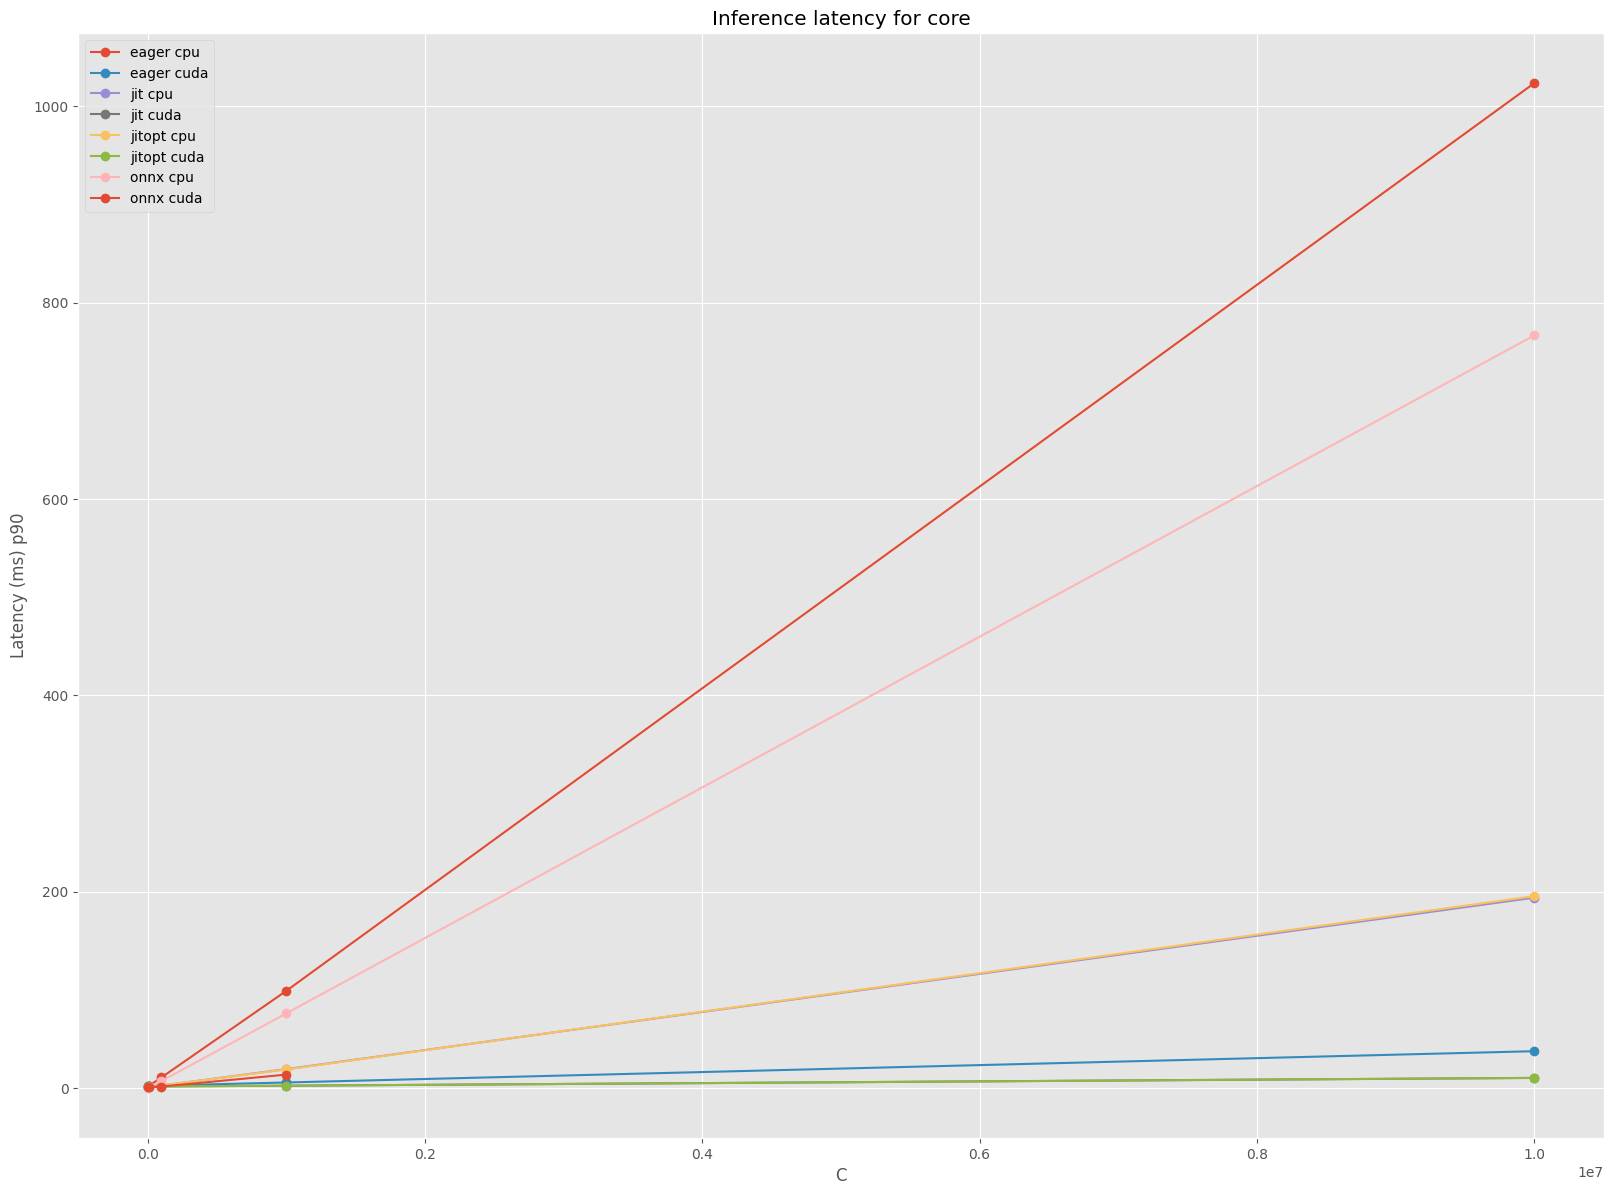

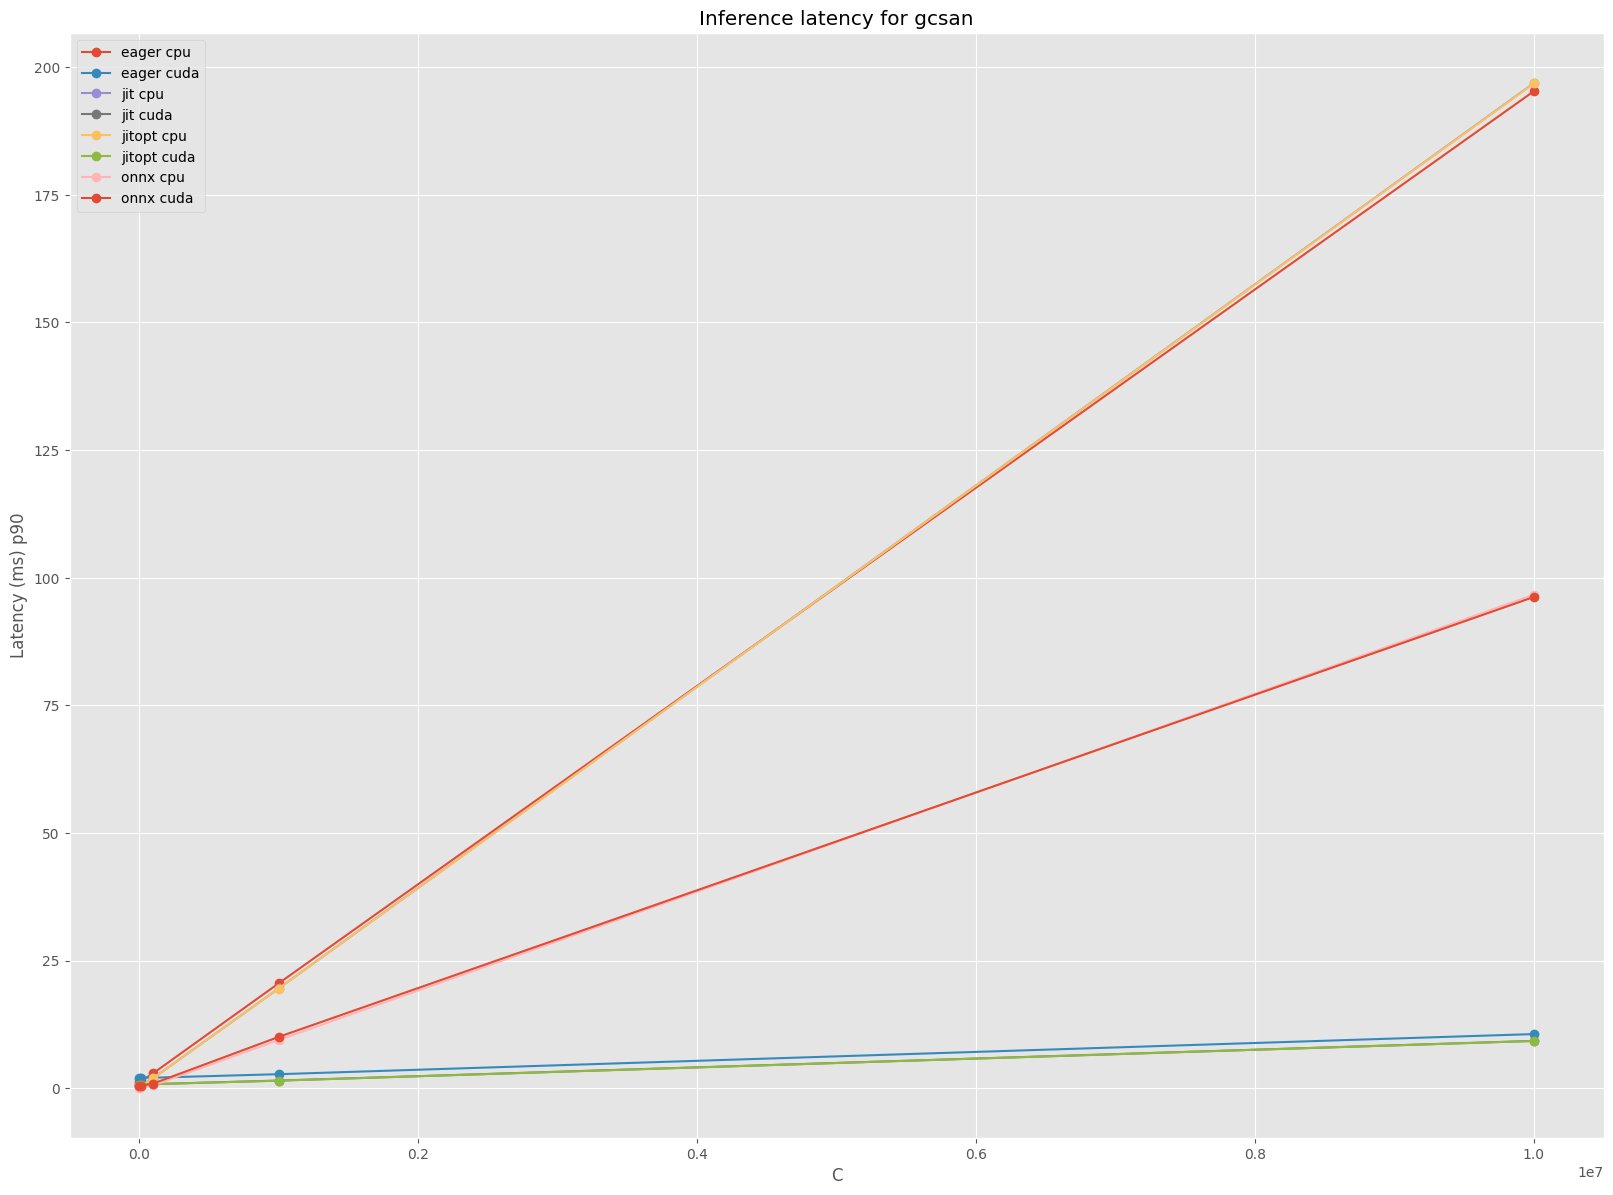

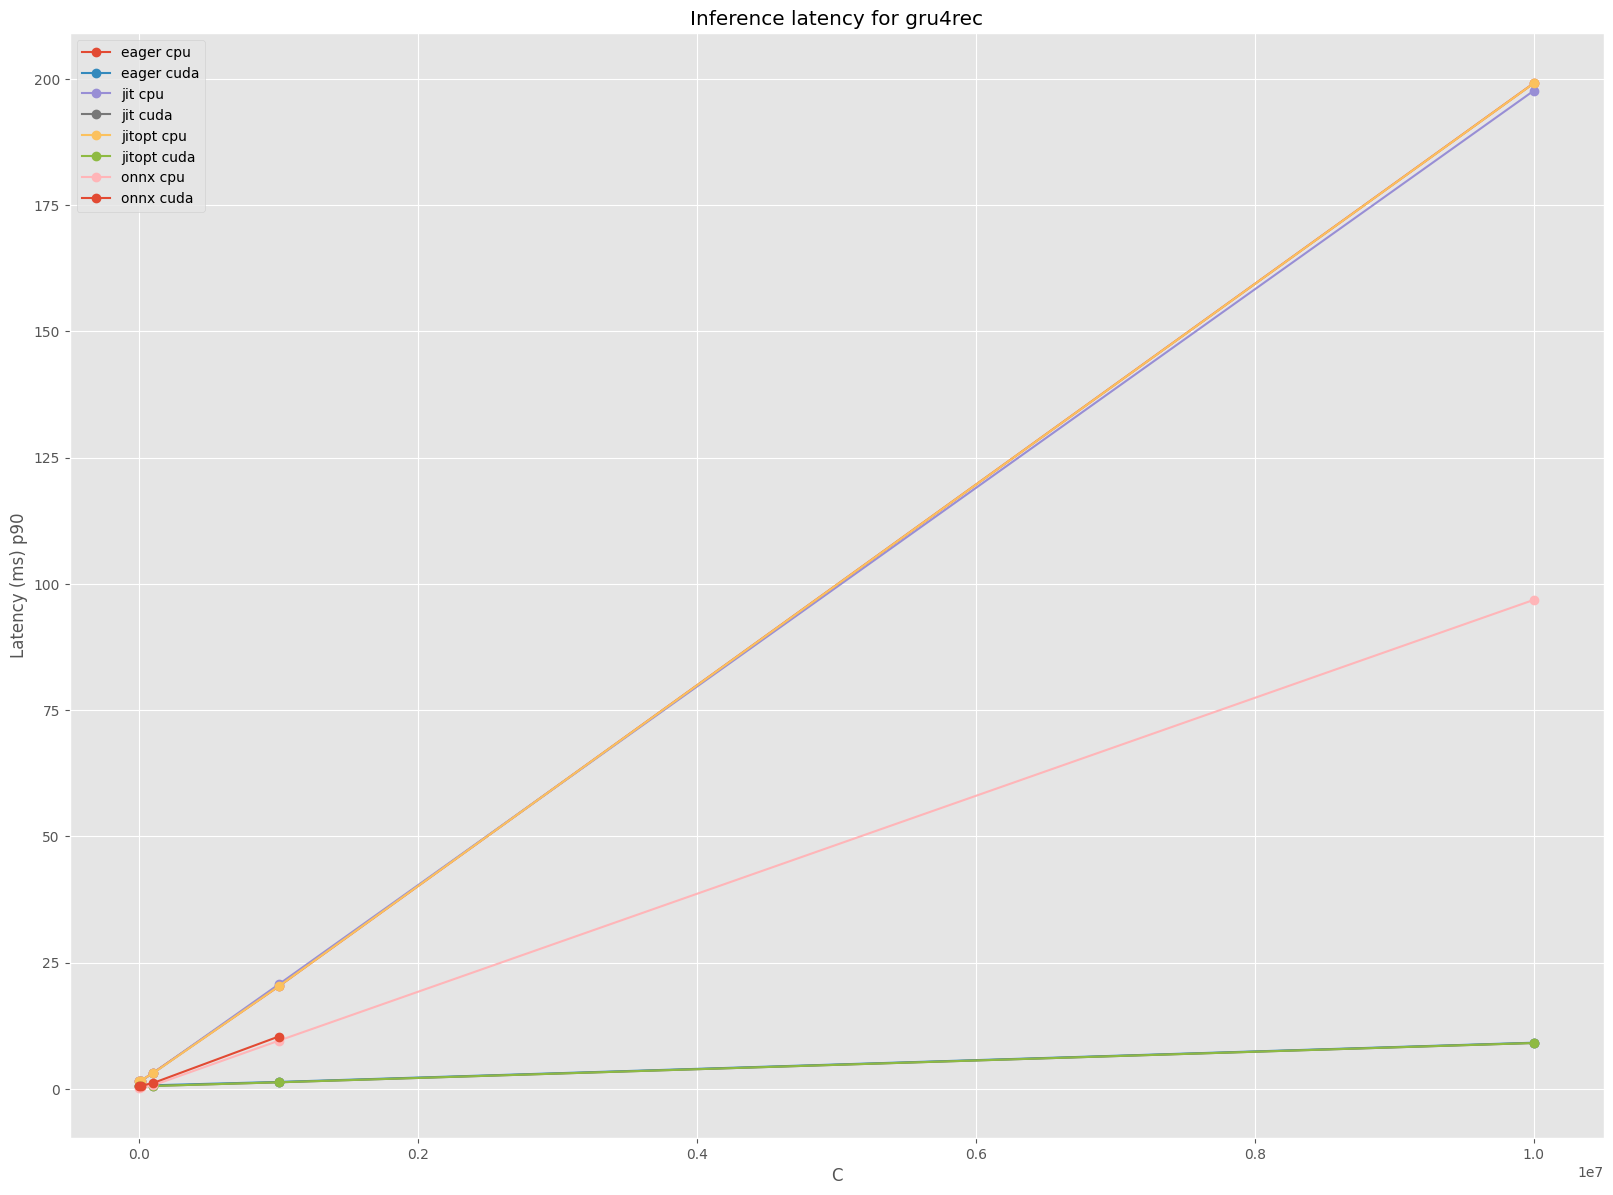

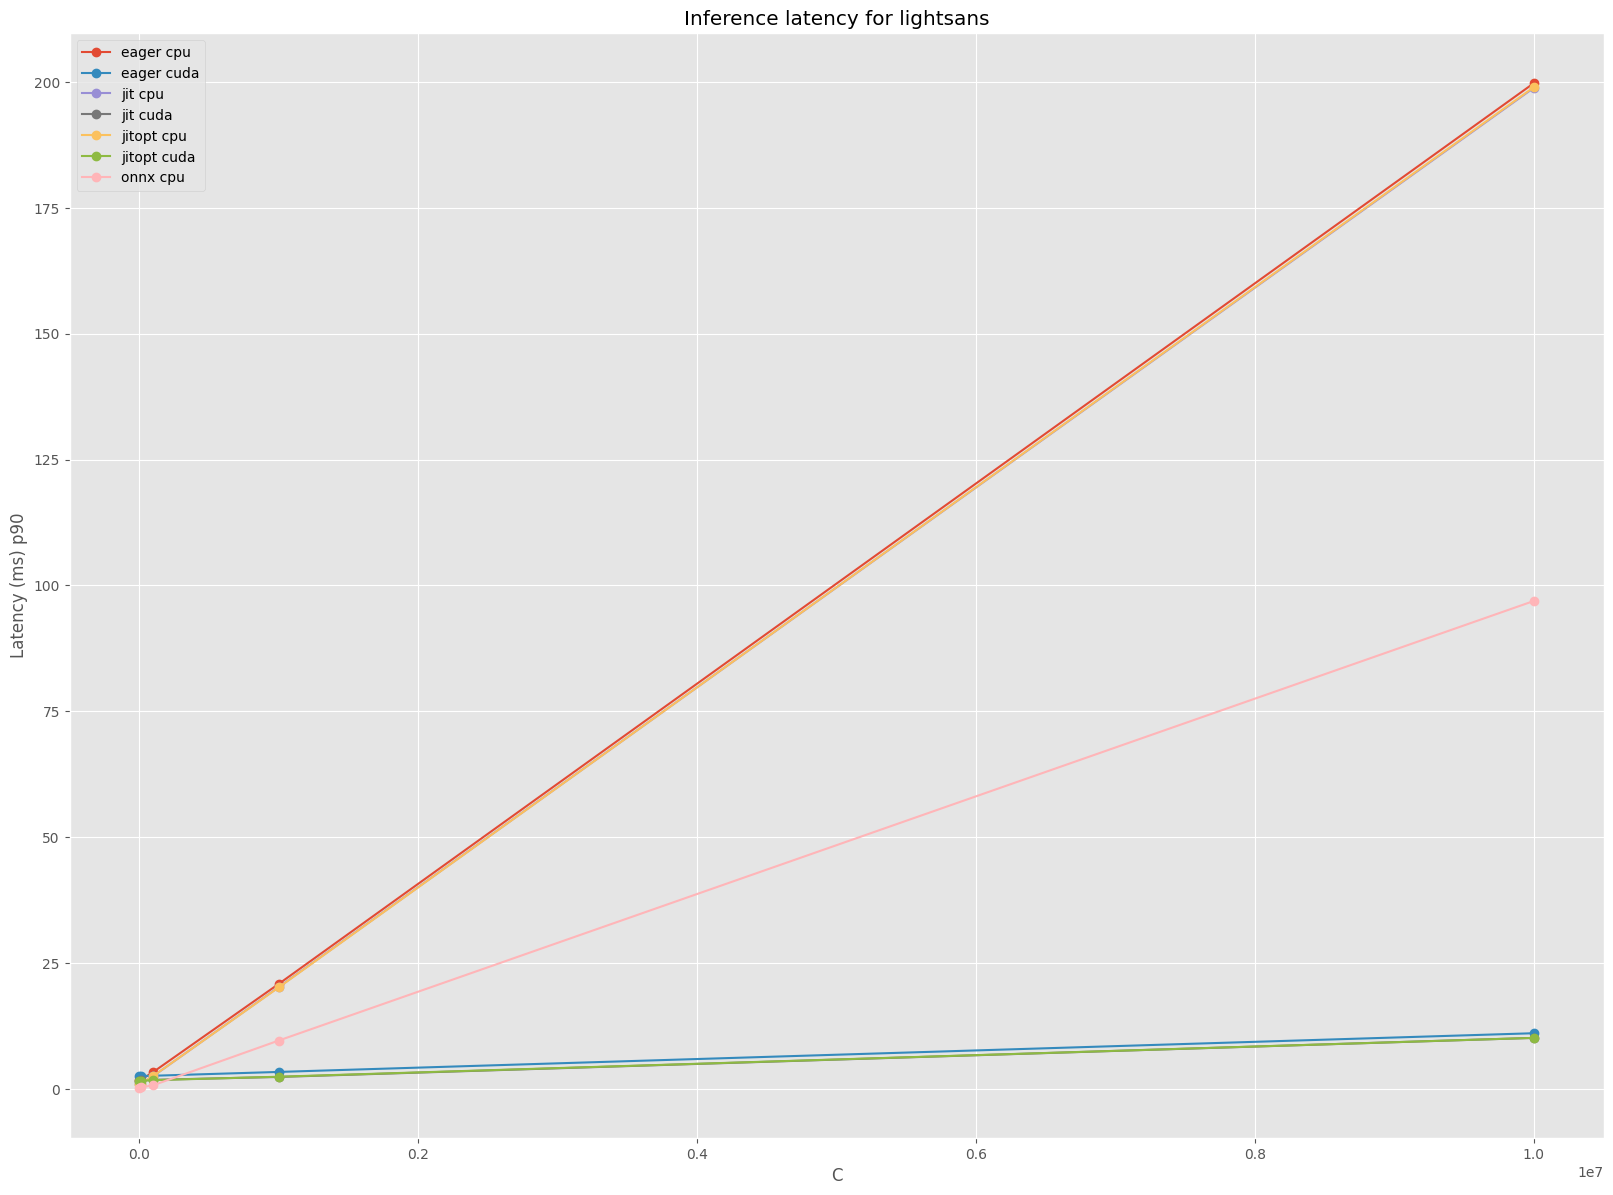

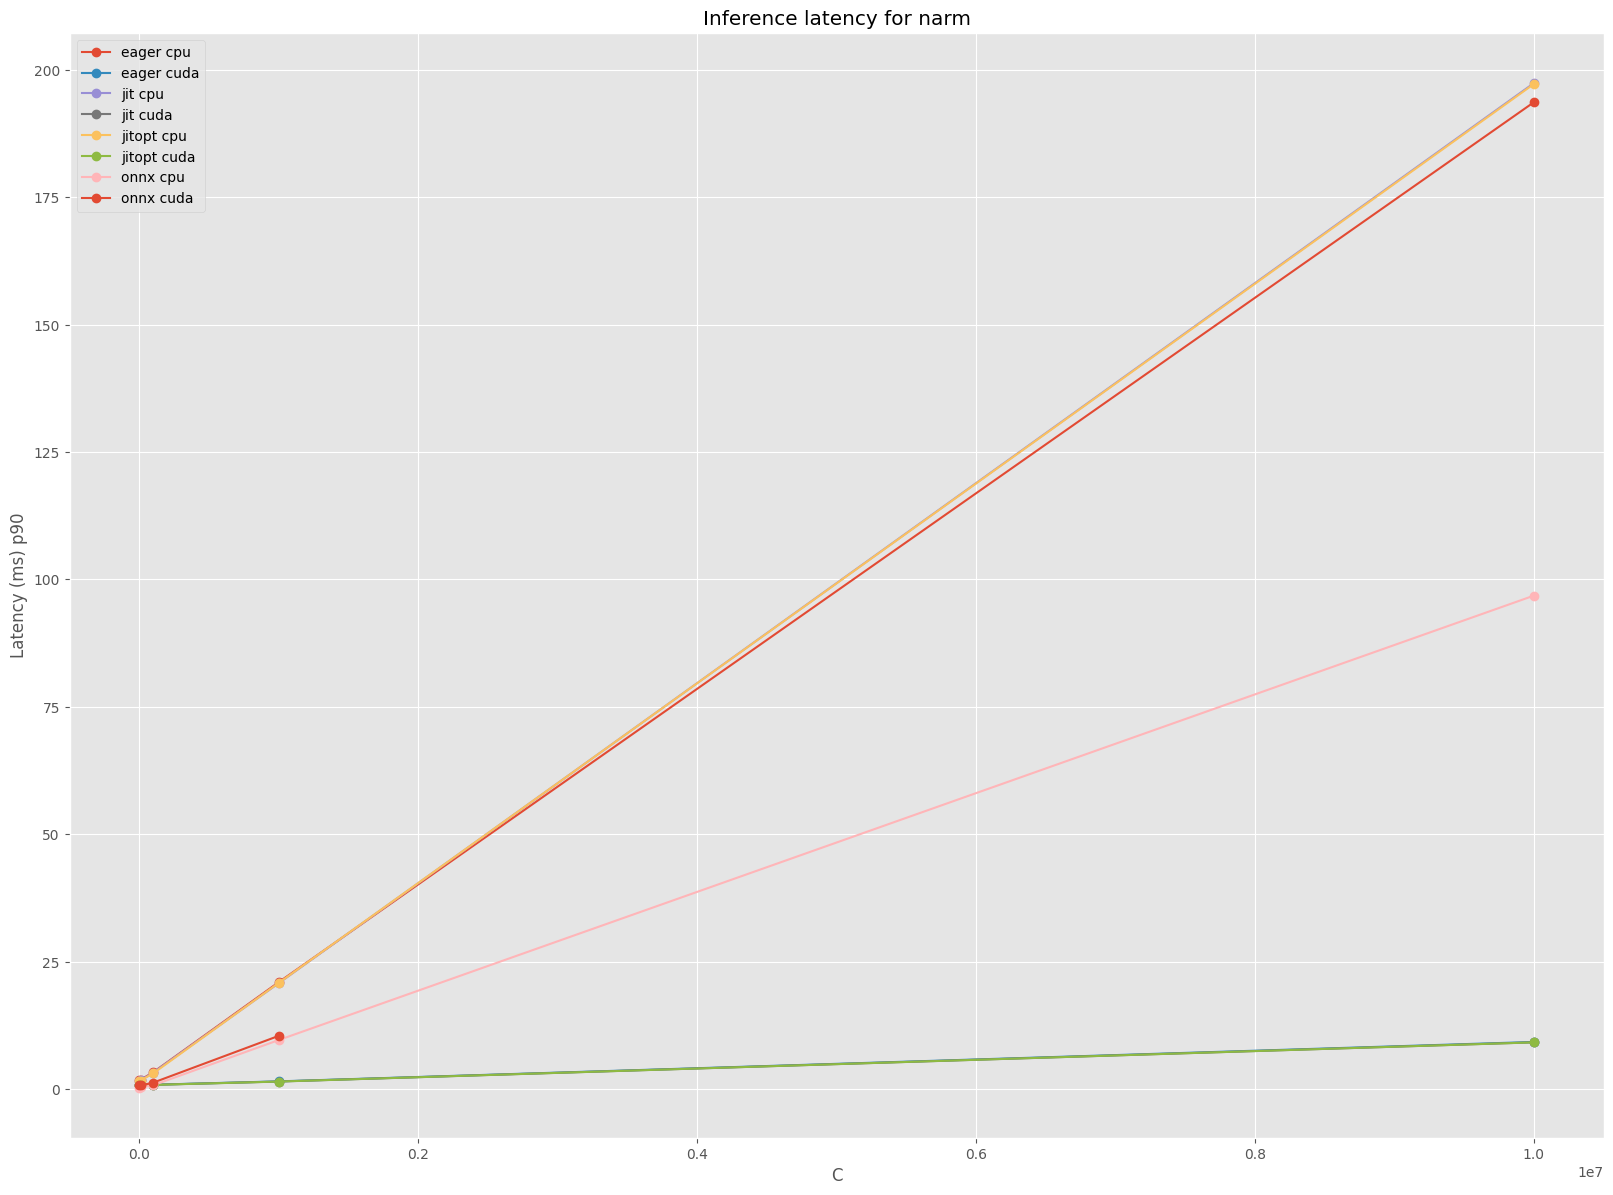

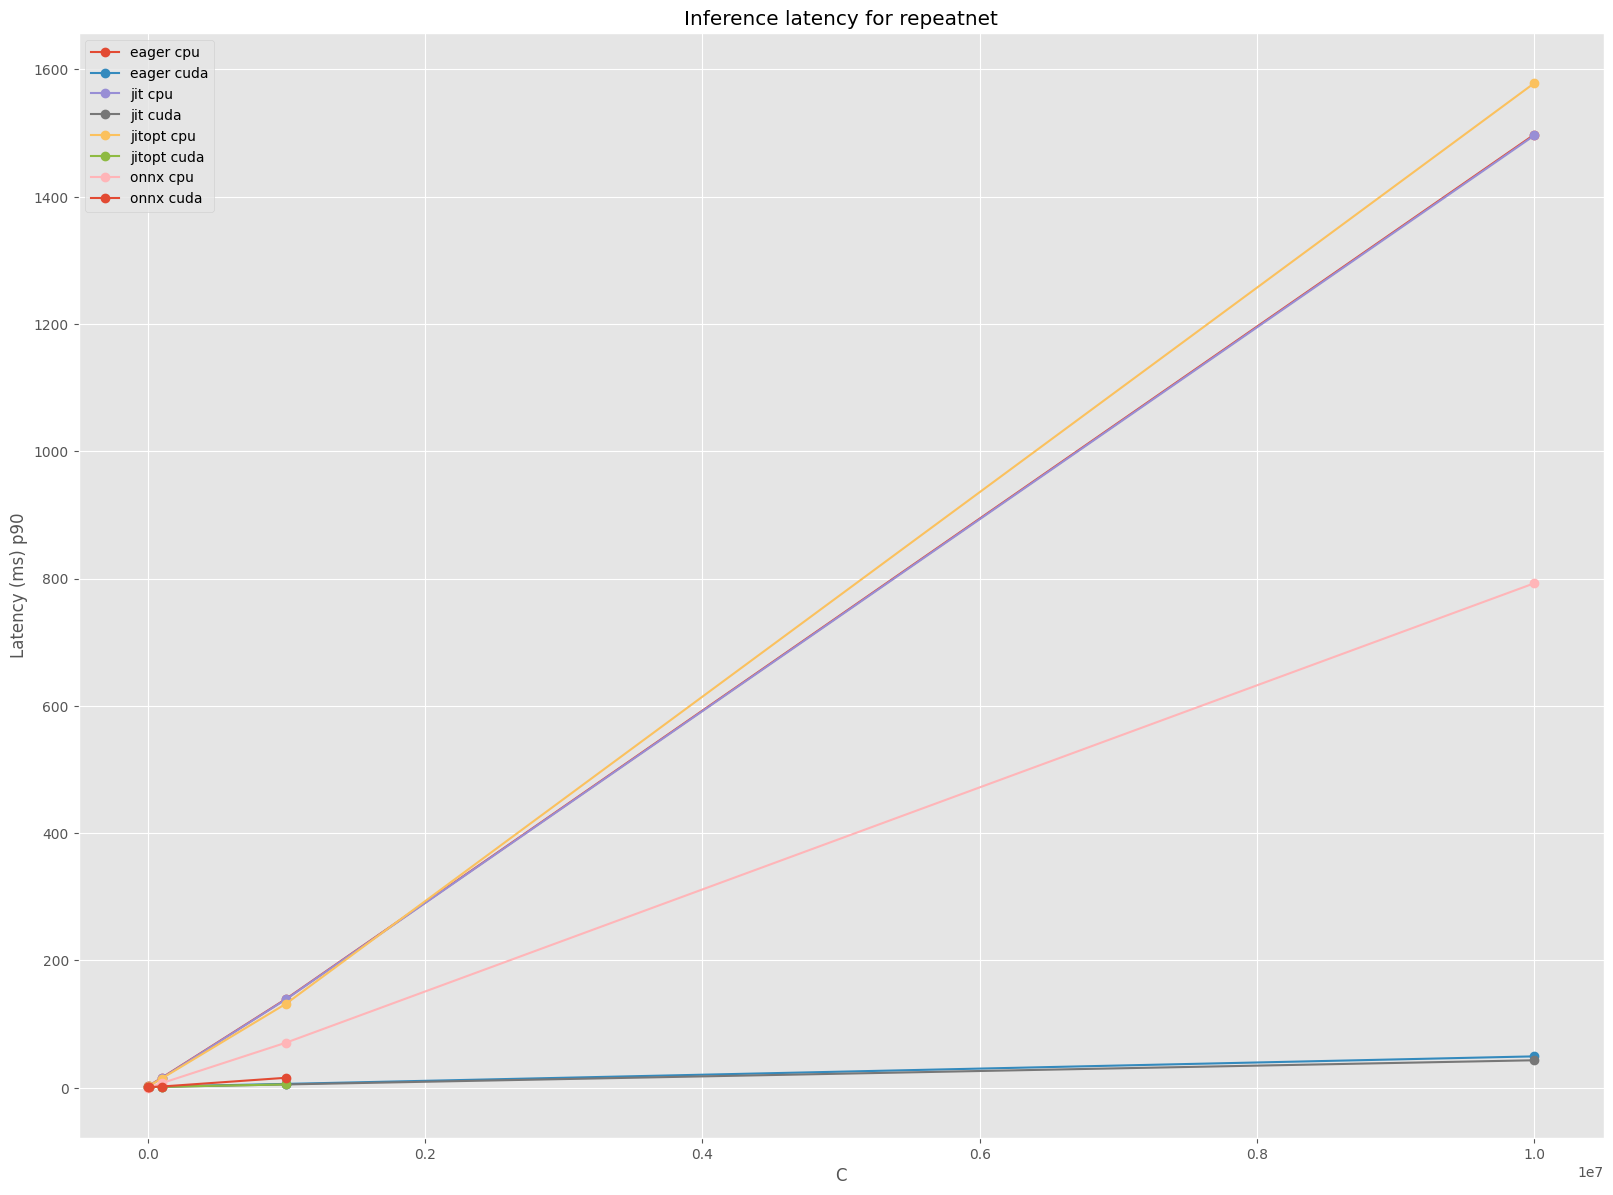

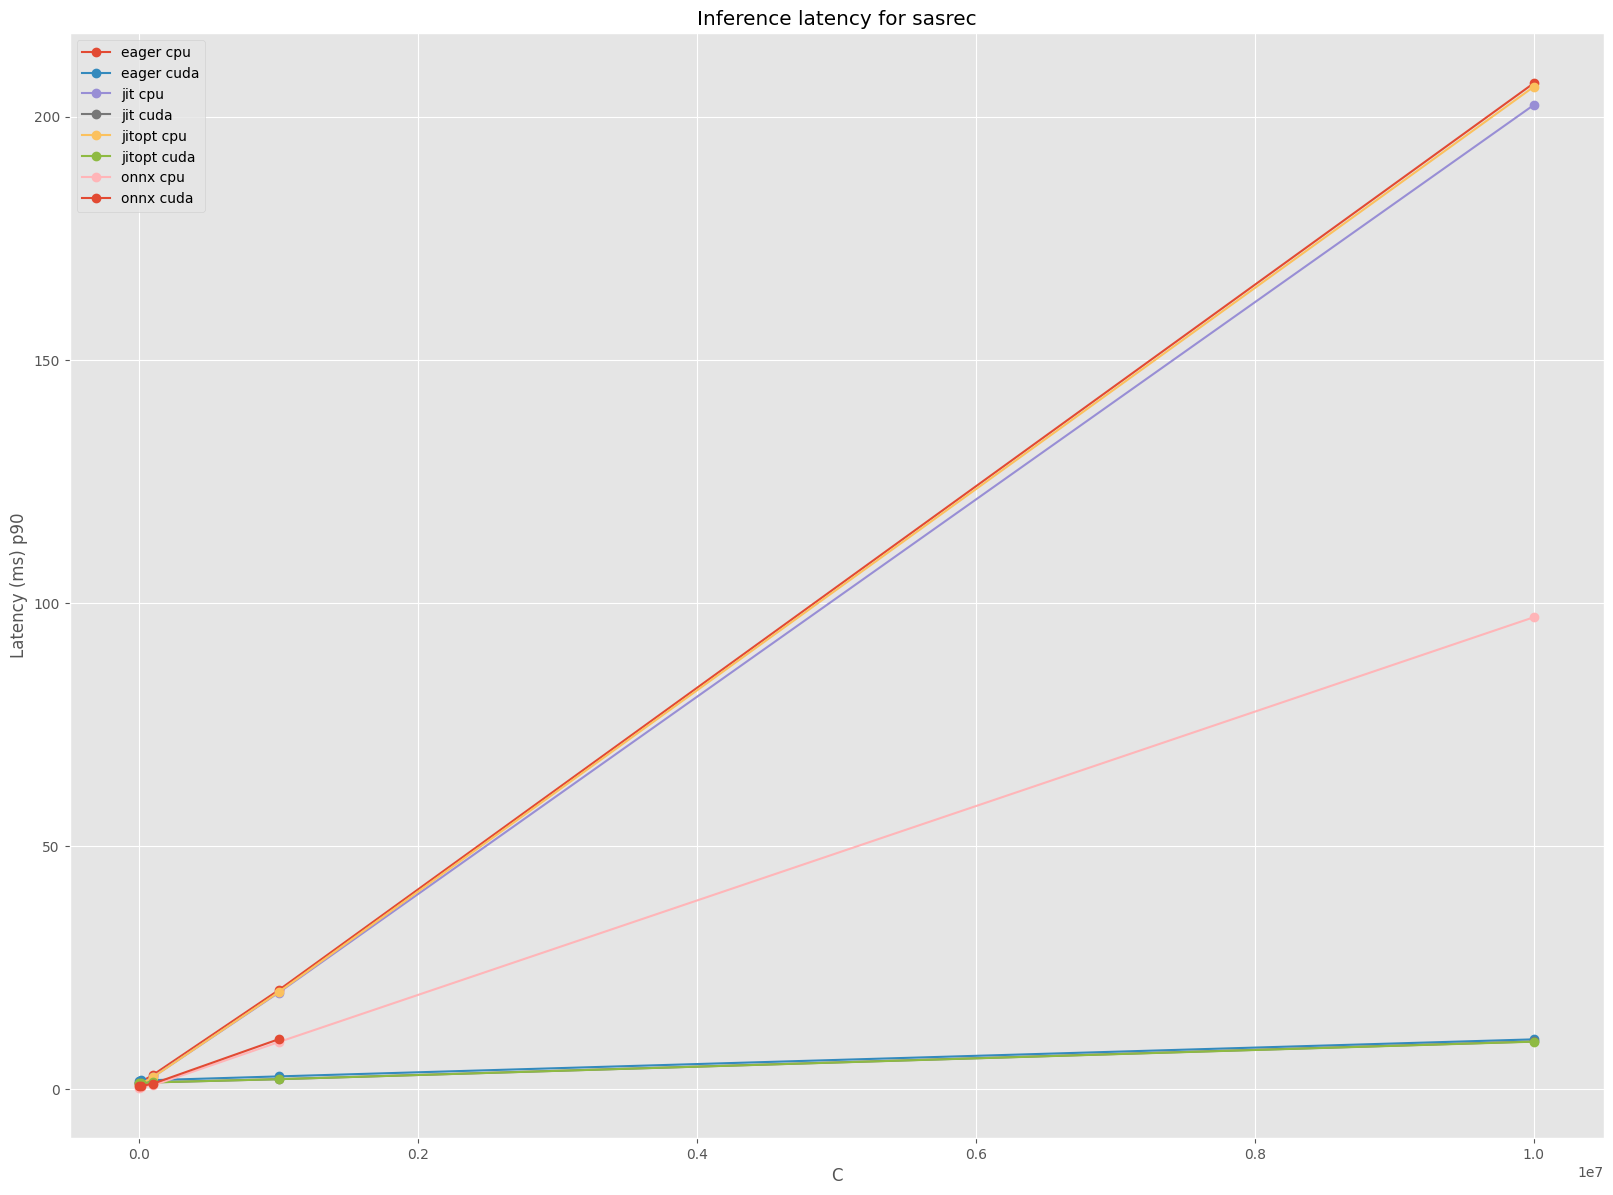

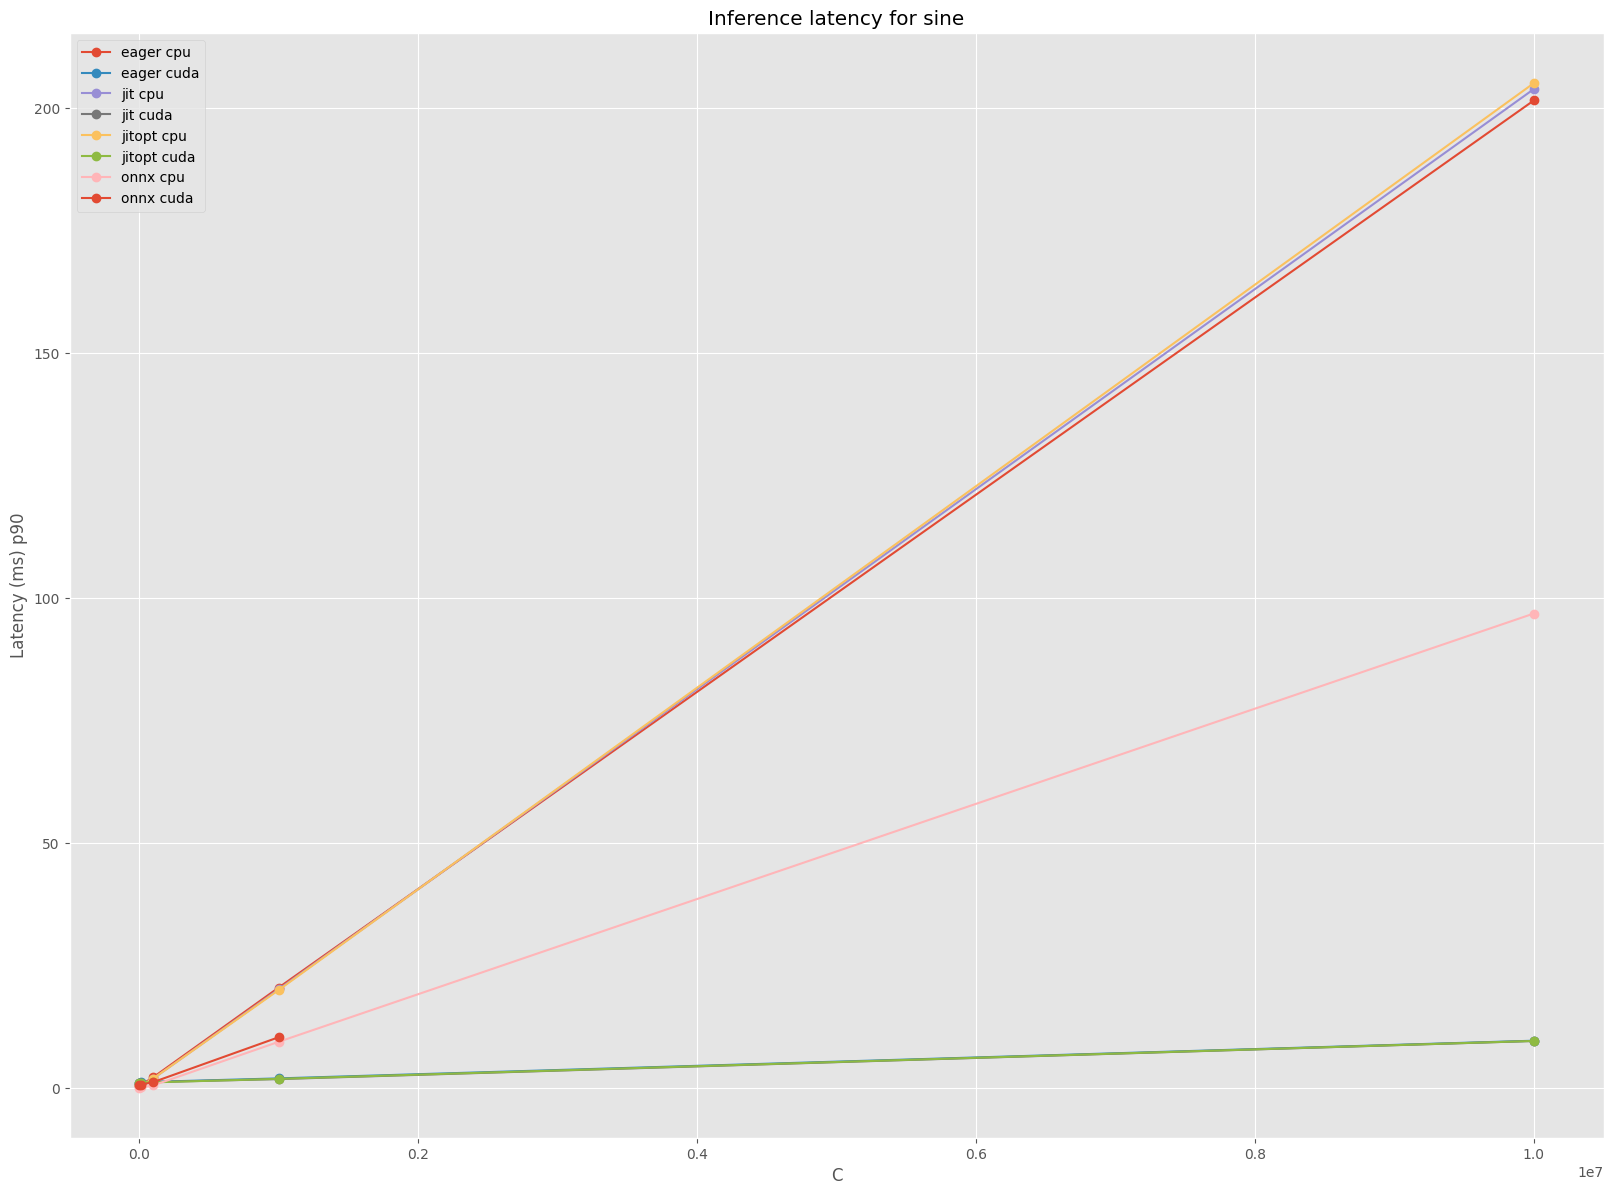

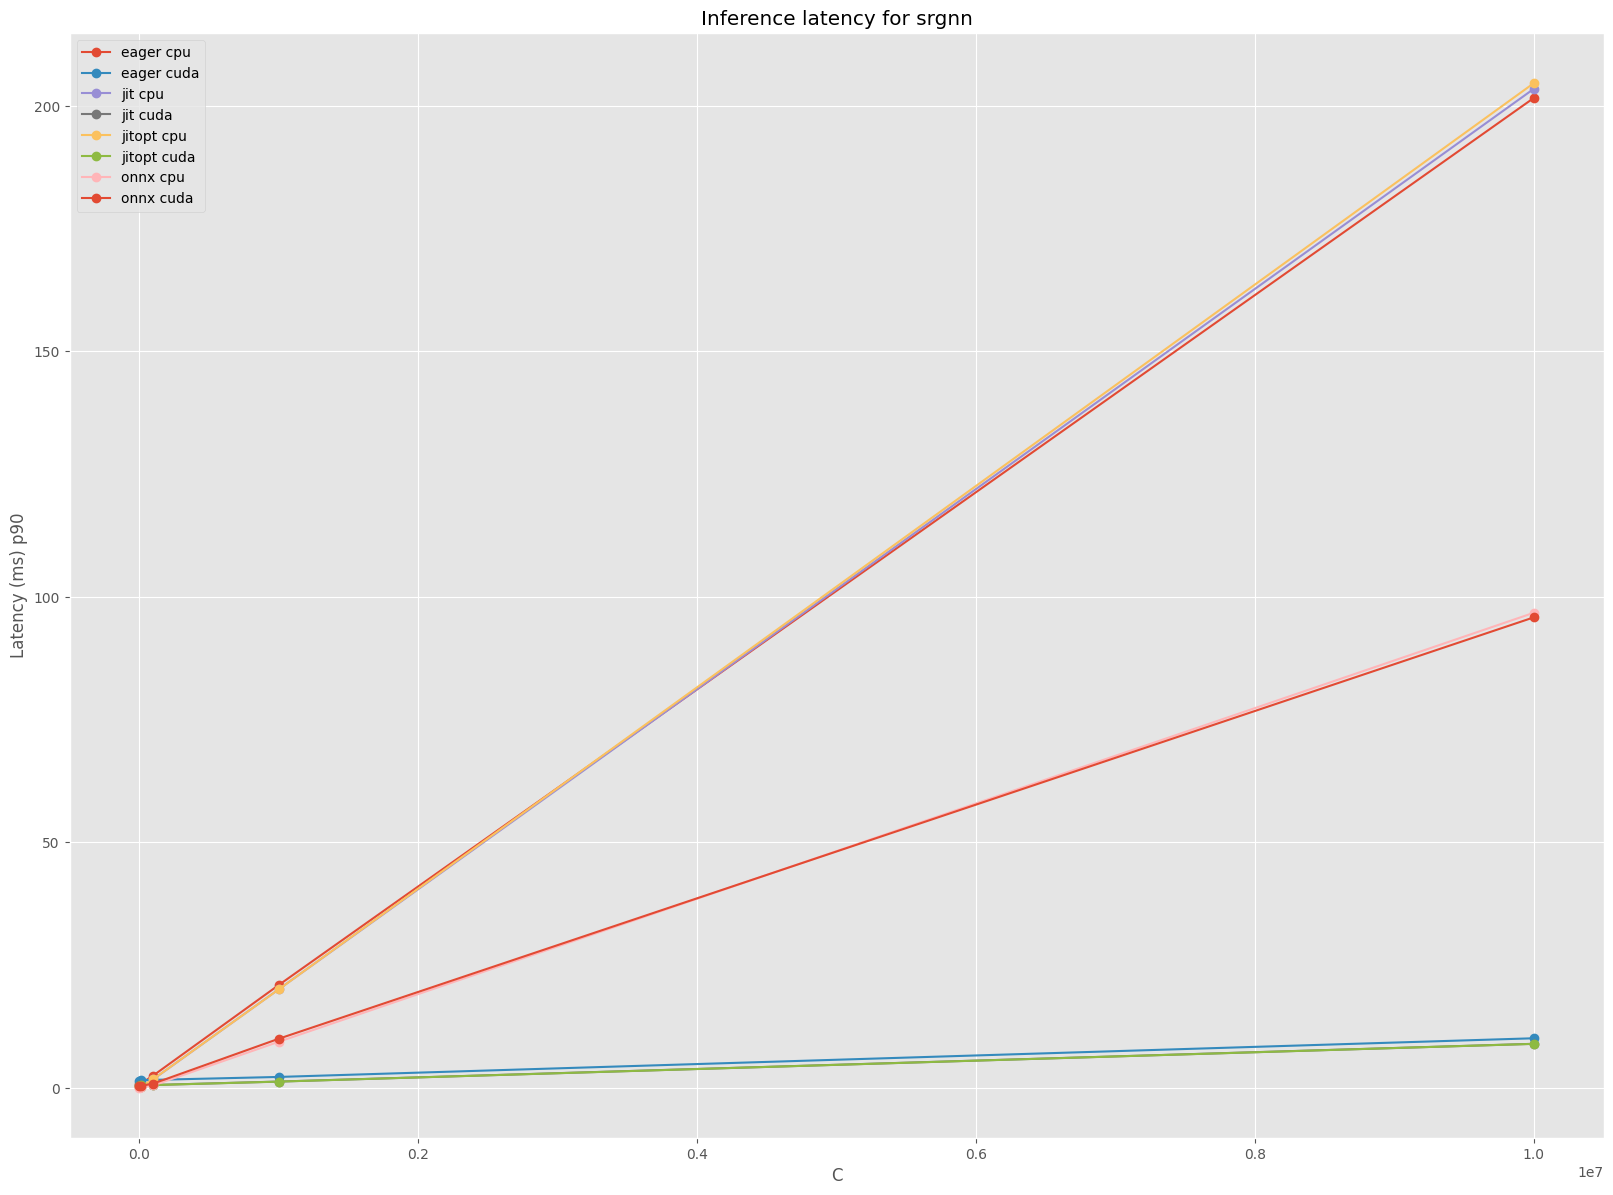

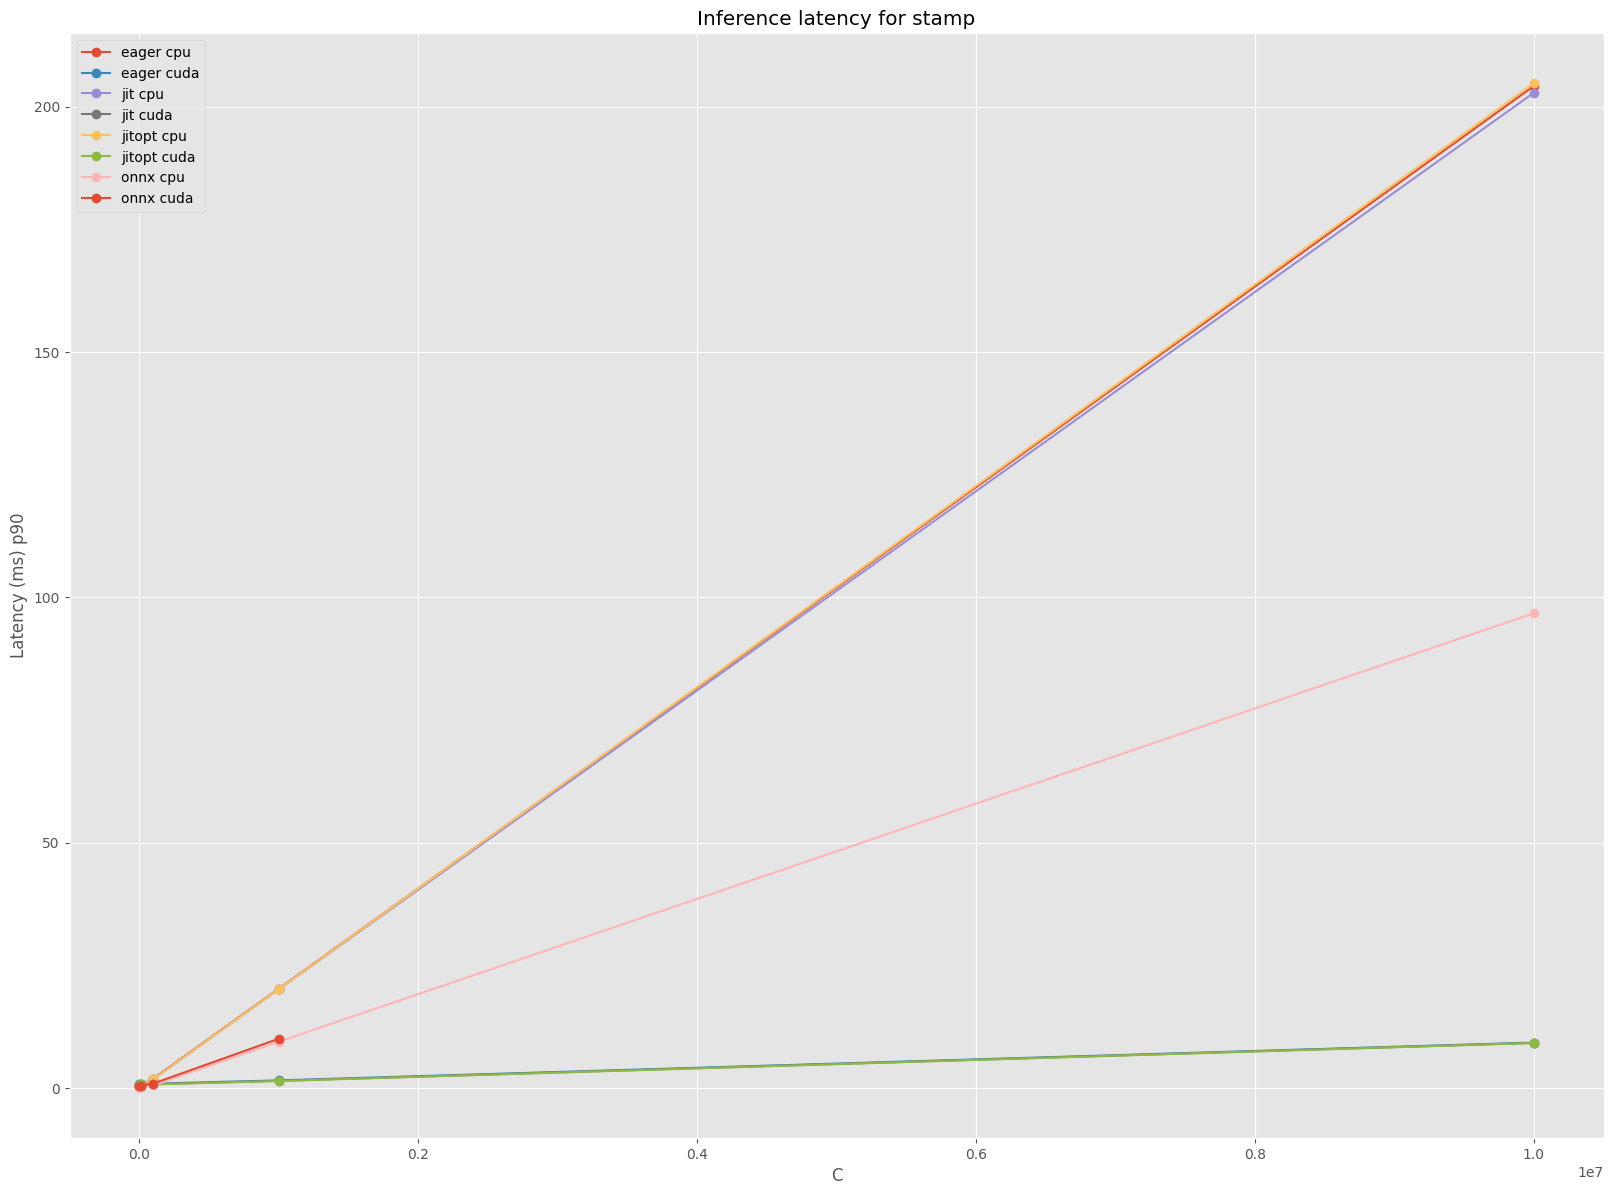

In [262]:
for model_name in ['core', 'gcsan', 'gru4rec', 'lightsans', 'narm', 'repeatnet', 'sasrec', 'sine', 'srgnn',
                        'stamp']:
    runtimes = ['eager', 'jit', 'jitopt', 'onnx']
    devices = ['cpu', 'cuda']
    datasource = 'bolcom'
    fig, ax = plt.subplots(figsize=(16, 12))
    for runtime in runtimes:
        for device in devices:
            results = get_results(model_name, runtime, device, datasource)
            if len(results) > 0:
                q90s = []
                cs = []
                for C, latency_df in results.items():
                    filtered_df = latency_df[latency_df['DateTime'] >= (latency_df['DateTime'].min() + pd.Timedelta(seconds=5))]
                    # add 1 ms for log transformation
                    # filtered_df['LatencyInMs'] = filtered_df['LatencyInMs'] + 1
                    # sns.kdeplot(data = filtered_df['LatencyInMs'], cumulative = True, label = f'{C}', log_scale=False, ax=ax)
                    q90 = np.percentile(filtered_df['LatencyInMs'], q=[0.9])
                    q90s.append(q90)
                    cs.append(C)
                plt.plot(cs, q90s, marker='o', label=f'{runtime} {device}')    
    plt.title(f'Inference latency for {model_name}')
    # Get the matplotlib axis object
    ax = plt.gca()
    # Set the x-axis limits
    # ax.set_xlim([0, 20])
    # plt.axvline(x = 50, label = '50ms threshold')
    ax.legend()
    # plt.yscale('log')
    # plt.legend(title='Unique items in catalog')
    plt.tight_layout()
    plt.ylabel('Latency (ms) p90')
    plt.xlabel('C')
    plt.savefig(f'{model_name}_{datasource}.pdf', bbox_inches='tight')
    plt.show()